
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic_filtered.csv', index_col = 'Unnamed: 0')
print(df.head())

   pclass  survived  gender      age  sibsp  parch    fare embarked
0       1         1  female  29.0000      0      0  211.34        S
1       1         1    male   0.9167      1      2  151.55        S
2       1         0  female   2.0000      1      2  151.55        S
3       1         0    male  30.0000      1      2  151.55        S
4       1         0  female  25.0000      1      2  151.55        S


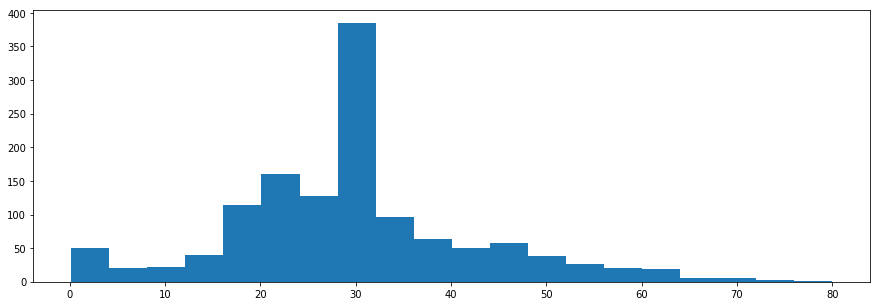

In [11]:
# plot histogram of ages of people
plt.figure(figsize = (15,5))
plt.hist(df.age, bins = 20)
plt.show()

[321 277 709]
Int64Index([1, 2, 3], dtype='int64', name='pclass')


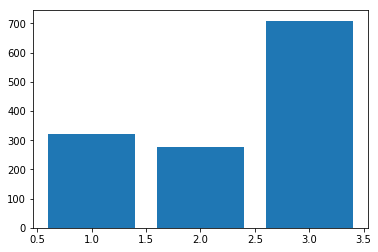

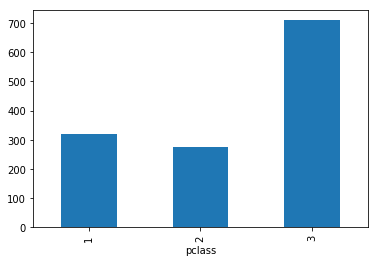

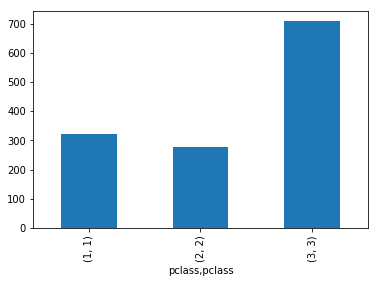

In [25]:
grp = df.groupby('pclass')
# method - 1
data = grp.pclass.count()
print(data.values)
print(data.index)
plt.bar(x = data.index, height = data.values)
plt.show()

# method - 2
grp.pclass.count().plot(kind = 'bar')
plt.show()

# method - 3
grp.pclass.value_counts().plot(kind = 'bar')
plt.show()

<BarContainer object of 2 artists>

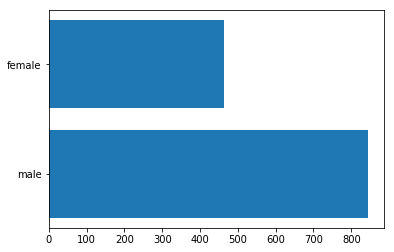

In [26]:
# plot a bar-chart depicting the ratio of males to females
data = df.gender.value_counts()
plt.barh(data.index, data.values)
plt.show()

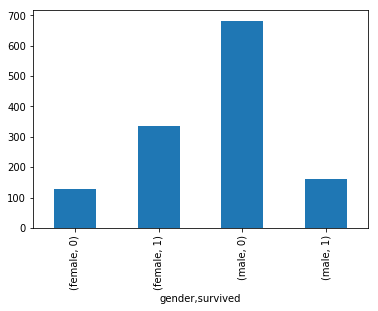

('female', 0)
('female', 1)
('male', 0)
('male', 1)


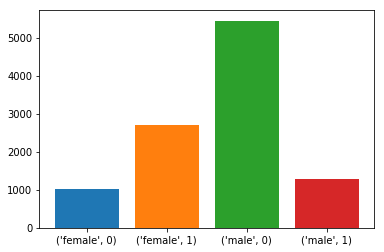

In [53]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
# method-1
grp = df.groupby(['gender','survived'])
grp.survived.count().plot(kind = 'bar')
plt.show()

# method-2: Tough one..
grp = df.groupby(['gender','survived'])
for key in grp.groups:
    print(key)
    plt.bar( str(key) , grp.get_group(key).size)
plt.show()

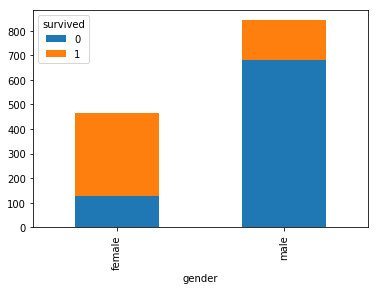

male      682
female    127
Name: gender, dtype: int64


<BarContainer object of 2 artists>

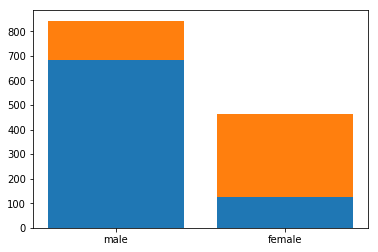

In [90]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
# method - 1
df.groupby(['gender','survived']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

# method - 2
alive = df[df.survived == 1]
dead = df[df.survived == 0]

res = dead.gender.value_counts()
print(res)
plt.bar(res.index, res.values)
res1 = alive.gender.value_counts()[res.index]
plt.bar(res1.index, res1.values, bottom = res.values)

In [86]:
alive.gender.value_counts()[ ['male','female']]

male      161
female    337
Name: gender, dtype: int64

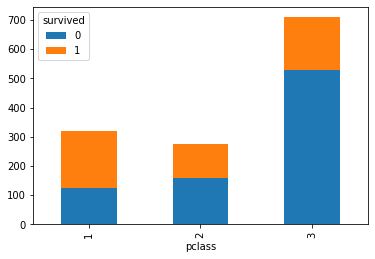

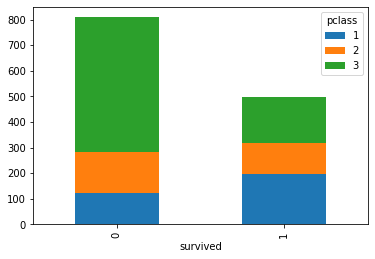

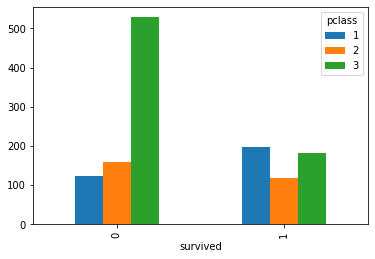

In [5]:
# plot stacked bar of survived with different pclass in same bar
df.groupby(['pclass','survived']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()


df.groupby(['survived', 'pclass']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()


df.groupby(['survived', 'pclass']).size().unstack().plot(kind = 'bar')
plt.show()

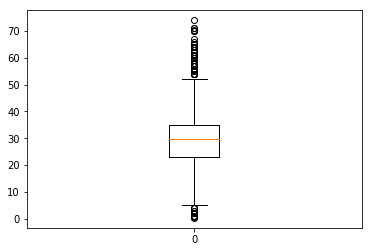

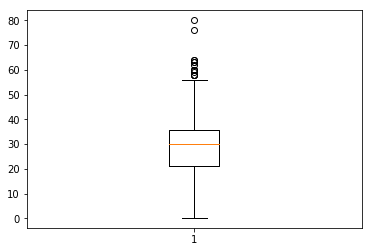

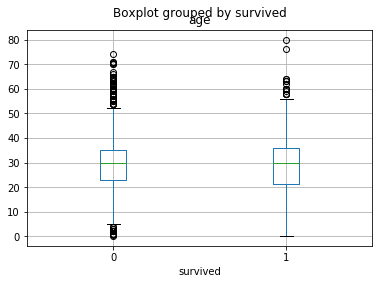

In [122]:
# plot box plot of ages of survived vs not-survived

res = df.groupby('survived')
for key in res.groups:
    plt.boxplot(res.get_group(key).age, labels = [key])
    plt.show()

    
df.boxplot(column=['age'], by = 'survived')
plt.show()

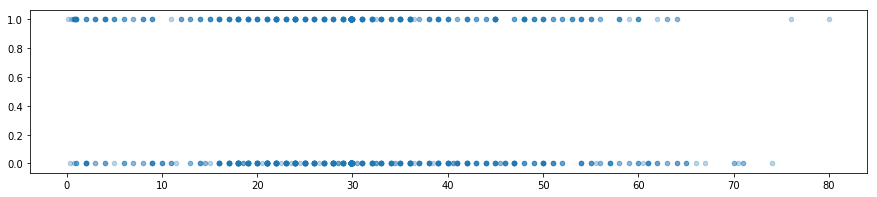

In [134]:
# plot scatter plot of ages vs survived.
plt.figure(figsize = (15,3))
plt.scatter(df.age, df.survived, s = 20, alpha = 0.3)
plt.show()